In [1]:
import os, sys
import subprocess
import json
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from coffea import processor, util, hist
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from boostedhiggs import VBFArrayProcessor

/opt/conda/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [3]:
with open('xsec.json') as f:
    xs = json.load(f)
with open('pmap.json') as f:
    pmap = json.load(f)
with open('lumi.json') as f:
    lumis = json.load(f)
years = ['2018']

In [4]:
df_dict = {}

for year in years:
    
    df_dict[year] = {}
    infiles = subprocess.getoutput("ls outfiles-array/"+year+"_dask_*.coffea").split()

    for filename in infiles:
        print("Loading "+filename)

        if os.path.isfile(filename):
            out = util.load(filename)
        
            for k in out.keys():
                df = pd.DataFrame()
                for c in ['number', 'lumiblock', 'run', 'pt', 'eta', 'phi', 'n2ddt', 'msd', 'ddb', 'deta', 'dphi', 'mjj']:                    
                    df[c] = out[k][c].value
                    
                df_dict[year][k] = df 


Loading outfiles-array/2018_dask_JetHTData.coffea


In [6]:
df = pd.DataFrame()
for k in df_dict['2018'].keys():
    df_dict['2018'][k]['era'] = k
    df = pd.concat([df,df_dict['2018'][k]])

In [17]:
df_pass = df[(df['ddb']>0.64) & (df['mjj']>1000) & (df['deta']>3.5) & (df['msd']>124.8) & (df['msd']<125.3)]

In [18]:
df_pass

,number,lumiblock,run,pt,eta,phi,n2ddt,msd,ddb,deta,dphi,mjj,era
62444,488169591.0,262.0,323727.0,613.5,-0.498230,-2.562500,-0.022960,125.159533,0.741211,4.210205,-0.677979,2220.704834,JetHT_Run2018D
65252,107410667.0,73.0,321813.0,478.5,0.367188,-1.646240,-0.062532,125.185081,0.748047,3.842285,-0.895508,1115.928711,JetHT_Run2018D
78861,489694607.0,253.0,321712.0,519.5,-0.661499,0.480164,-0.019274,125.021587,0.700195,3.770508,-1.537842,1044.664795,JetHT_Run2018D


In [28]:
df_pass.iloc[2]

number          489694607.0
lumiblock             253.0
run                321712.0
pt                    519.5
eta               -0.661499
phi                0.480164
n2ddt             -0.019274
msd              125.021587
ddb                0.700195
deta               3.770508
dphi              -1.537842
mjj             1044.664795
era          JetHT_Run2018D
Name: 78861, dtype: object

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([125.02158673, 125.03793619, 125.05428565, 125.07063512,
        125.08698458, 125.10333404, 125.1196835 , 125.13603296,
        125.15238242, 125.16873189, 125.18508135]),
 <BarContainer object of 10 artists>)

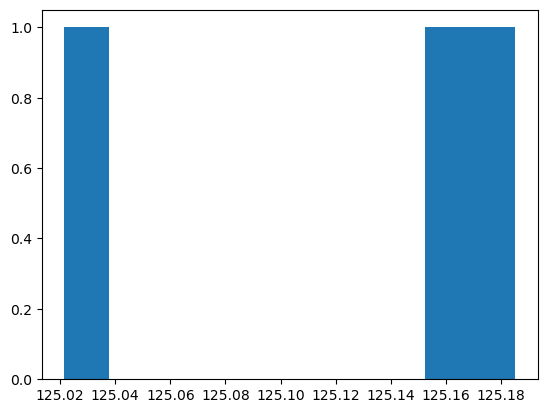

In [20]:
plt.hist(df_pass['msd'])

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([0.70019531, 0.70498047, 0.70976562, 0.71455078, 0.71933594,
        0.72412109, 0.72890625, 0.73369141, 0.73847656, 0.74326172,
        0.74804688]),
 <BarContainer object of 10 artists>)

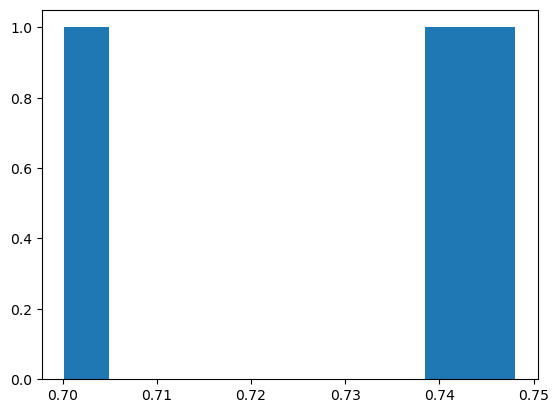

In [21]:
plt.hist(df_pass['ddb'])

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1044.66479492, 1162.26879883, 1279.87280273, 1397.47680664,
        1515.08081055, 1632.68481445, 1750.28881836, 1867.89282227,
        1985.49682617, 2103.10083008, 2220.70483398]),
 <BarContainer object of 10 artists>)

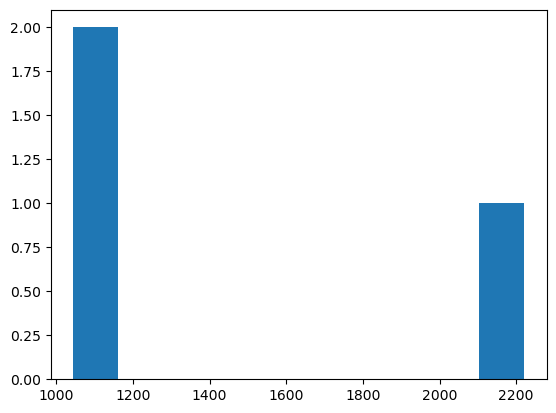

In [22]:
plt.hist(df_pass['mjj'])

(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([478.5, 492. , 505.5, 519. , 532.5, 546. , 559.5, 573. , 586.5,
        600. , 613.5]),
 <BarContainer object of 10 artists>)

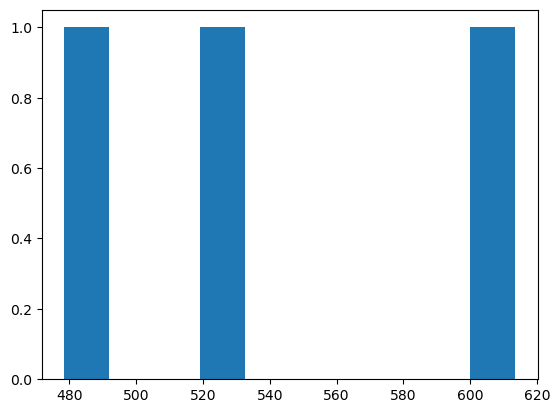

In [23]:
plt.hist(df_pass['pt'])

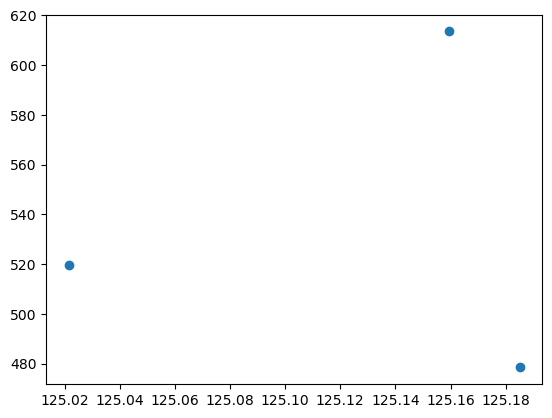

In [24]:
plt.scatter(df_pass['msd'],df_pass['pt'])